# Problem set 1:

In [38]:
include("tests.jl"); # Ignore this

## Problem 1 : Babylonian square root

### 

To get the square root of y, Babylonians used the following algorithm:
$$
x_{n+1} = \frac{1}{2} \left( x_n + \frac{y}{x_n} \right)
$$
Iteratively starting with $x_0$, this algorithm converges to $\sqrt{y}$ within some tolerance $\epsilon$. 

* Write a function `babylonian_sqrt(y, ϵ, x0 = 1)` that returns the square root of y, starting with $x_0$ and iterating until the difference between two successive estimates is less than $\epsilon$.

* Test the function by comparing the result with the built in function `sqrt()` function.

* Also return the number of iterations needed to reach the desired tolerance.

* **Hint:** You can use the `abs()` function to compute the absolute value of a number.

* **Hint 2:** You don't need anythong more than a basic while loop.

In [55]:
# Here write the babylonian function: 
function babylonian_sqrt(y, ϵ, x0 = 1)
    x = x0
    count = 0
    while abs(sqrt(y) - x) > ϵ
        x = (1/2)*(x0+(y/x0))
        x0 = x
        count += 1
    end
    return x, count
    end;

In [56]:
# Check your work with the sqrt function and look at how many iterations it took to converge
babylonian_sqrt(9, 0.01, 1)

(3.00009155413138, 4)

## Counting nucleotides
Create a function that given a DNA strand (as a String, e.g. "AGAGAGATCCCTTA") it counts how much of each nucleotide (A G T or C) is present in the strand and returns the result as a dictionary mapping the nucleotides to their counts. The function should throw an error (using the error function) if an invalid nucleotide is encountered. Test your result with "ATATATAGGCCAX" and "ATATATAGGCCAA".

In [36]:
function count_nucleotides(strand)

    Gcount = 0
    Acount = 0
    Ccount = 0
    Tcount = 0
    n = length(strand)

    for i = 1:n

        if strand[i] == 'A'
            Acount += 1

        elseif strand[i] == 'G'
            Gcount += 1
        
        elseif strand[i] == 'C'
            Ccount += 1
        
        elseif strand[i] == 'T'
            Tcount += 1
        
        else
            return erf()
        end

    end

    return Dict('A' => Acount, 'G' => Gcount, 'T' => Tcount, 'C' => Ccount)
end;


In [39]:
test_Nucleotide(count_nucleotides);

Case 1: 'AGAGAGATCCCTTA' passed
Case 2: 'ATATATAGGCCAX' passed
Case 3: 'ATATATAGGCCAA' passed


## Problem 3: Fibonacci numbers

Using recursion (a function that calls itself) create a function that given an integer n it returns the n-th Fibonacci number. Apply it using map to the range 1:8 to get the result [1,1,2,3,5,8,13,21].


In [59]:
# Here fill in the fibonacci function
function Fib(n)
    if n == 0
        return 0
    elseif n == 1
        return 1
    else
        return Fib(n-1) + Fib(n-2)
    end
end;

In [60]:
nums = 1:8;
ans = Fib.(nums) # apply fibonacci element wise
test_fibonacci(ans);

Fibonacci sequence is correct


## Problem 4: Hamming distance
Create a function that calculates the Hamming distance of two equal DNA strands, given as strings. This distance is defined by counting (sequentially) the number of non-equal letters in the two strands, e.g. "ATA" and "ATC" have distance of 1, while "ATC" and "CAT" have distance of 3.

* **Hint:** this exercise has a one-liner solution, using the `zip` and `count` functions.

In [85]:
function Hamming(a,b)
    count = 0
    for i = 1:length(a)
        if a[i] != b[i]
            count += 1
        end
    end
    return count
end

Hamming (generic function with 1 method)

In [86]:
test_Hamming(Hamming);
Hamming("ATA", "ATC")

Case 1: 'ATA' and 'ATC' passed
Case 2: 'ATC' and 'CAT' passed
Case 3: 'ATC' and 'ATC' passed
Case 4: 'ATC' and 'CAC' passed


1

In [20]:
using CairoMakie

## Problem 5: Plotting 

Plot the sine function and its progressive Taylor expansion series:
$$
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1}
$$
for $x \in [-3\pi, 3\pi]$. Plot the function and the first 4 terms of the series in the same plot. Use a different color for each curve and add a legend.
* When plotting the series, plot the ylim in [-2,2]

In [31]:
# Here create the Taylor of sin function
function Taylor(n)
    x = range(-3*π, 3*π, length=100)
    sine = 0
    sign = 1
    for i = 0:n-1
        sine = sine .+ sign*(x.^(2*i+1))/factorial(2*i+1)
        sign = -sign
    end
    return sine
    end

Taylor (generic function with 1 method)

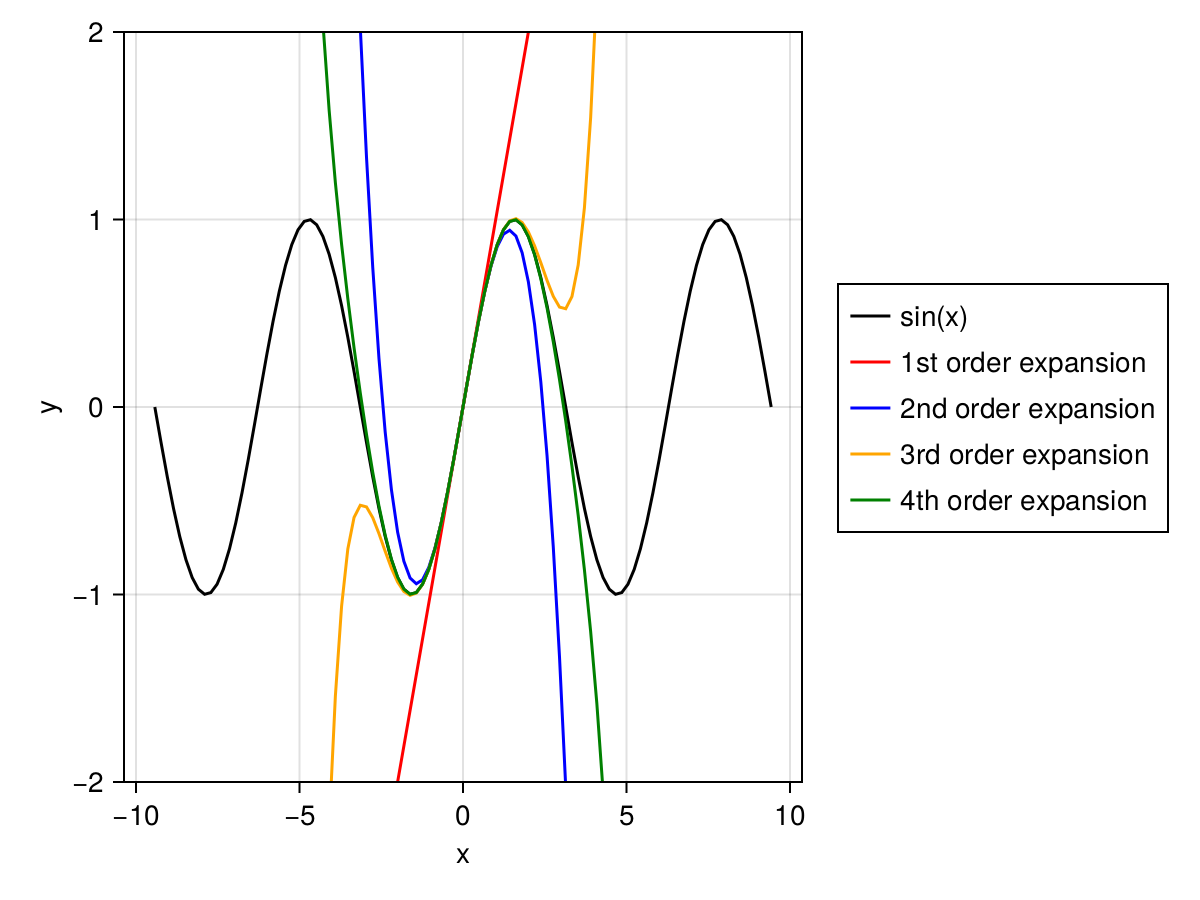

In [32]:
# Here write the code that calls taylor and plots it for different number of terms
y1 = Taylor(1)
y2 = Taylor(2)
y3 = Taylor(3)
y4 = Taylor(4)
x = range(-3*π, 3*π, length=100)
y0 = sin.(x)

f = Figure()
Axis(f[1, 1], xlabel="x", ylabel="y")
sine0 = lines!(x, y0, color = :black)
sine1 = lines!(x, y1, color = :red)
sine2 = lines!(x, y2, color = :blue)
sine3 = lines!(x, y3, color = :orange)
sine4 = lines!(x, y4, color = :green)
ylims!(-2, 2)

Legend(f[1, 2],
    [sine0, sine1, sine2, sine3, sine4],
    ["sin(x)", "1st order expansion", "2nd order expansion", "3rd order expansion", "4th order expansion"])

f

### Histograms

In [33]:
using Random: Xoshiro
rng = Xoshiro(1234)
xp1 = 0.2randn(rng, 10_000) .+ 0.5
xp2 = 0.5randn(rng, 10_000)
edges = -2:0.1:2; 

Using the two distributions generated above (xp1, xp2), plot the histograms of the two distributions to produce a figure like the one below. 

<center><img src="histogram.png" height="400"/></center>

**Hint: You can use `color=("red",0.75)` to determin the opacity**

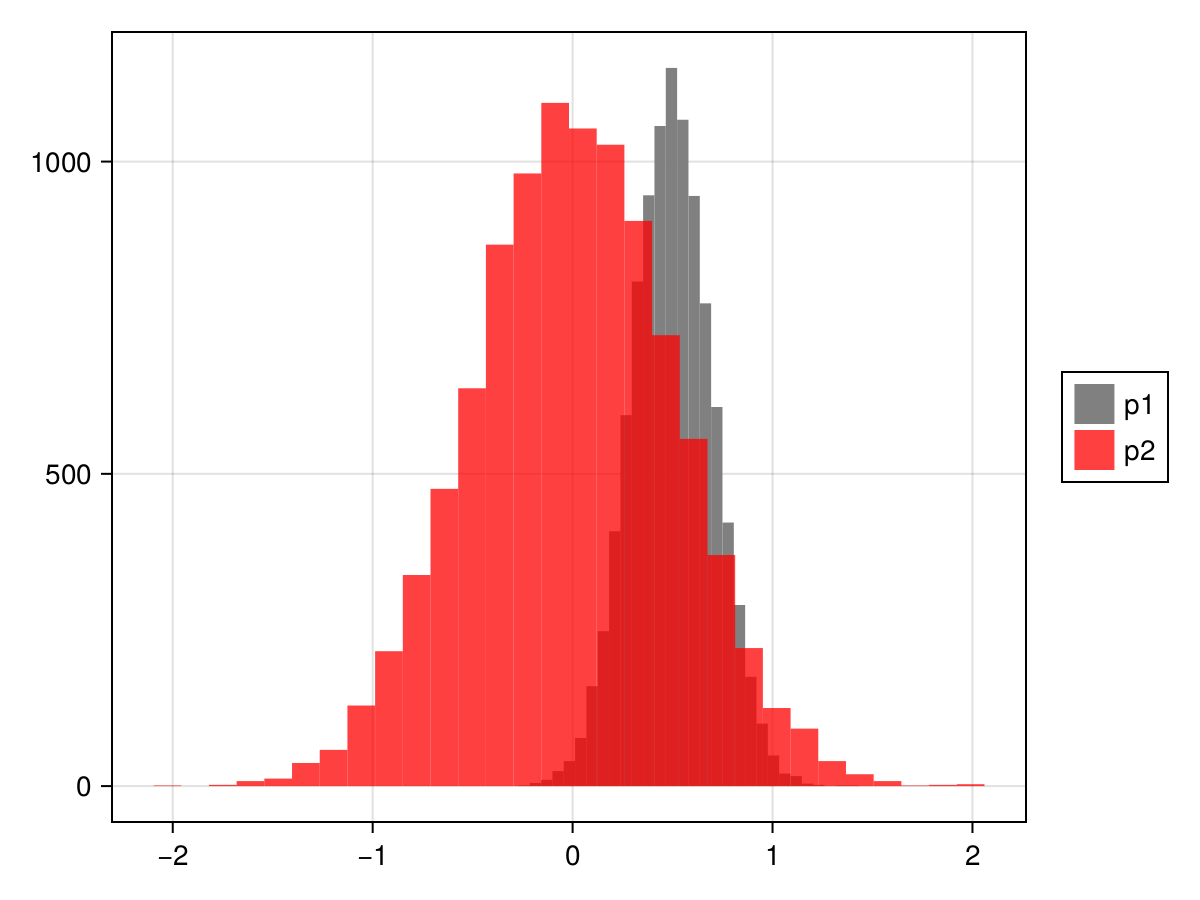

In [35]:
# Plot the histogram with code here.
fig = Figure()
ax = Axis(fig[1, 1])
p1 = hist!(xp1; bins = 30, color =:gray)
p2 = hist!(xp2; bins = 30, color =("red", 0.75))

Legend(fig[1,2],
    [p1, p2],
    ["p1", "p2"])
fig

## Problem 6: Plotting

Try to reproduce the following figure:

<center>
<img src="box.png" height="400"/>
</center>
you can use hidedecorations!(ax), and hidespines!(ax) to hide the decorations and spines of the plot.

To generate the spiral use the following expression:
$$
n = 4\\ 
t \in [0, 2\pi n]\\
x = (2\pi n - t) cos(t)\\
y = (2\pi n - t) sin(t)
$$

To generate the box use the following code:
```julia
Box(ax, color = colors[1], strokewidth = 0)
```

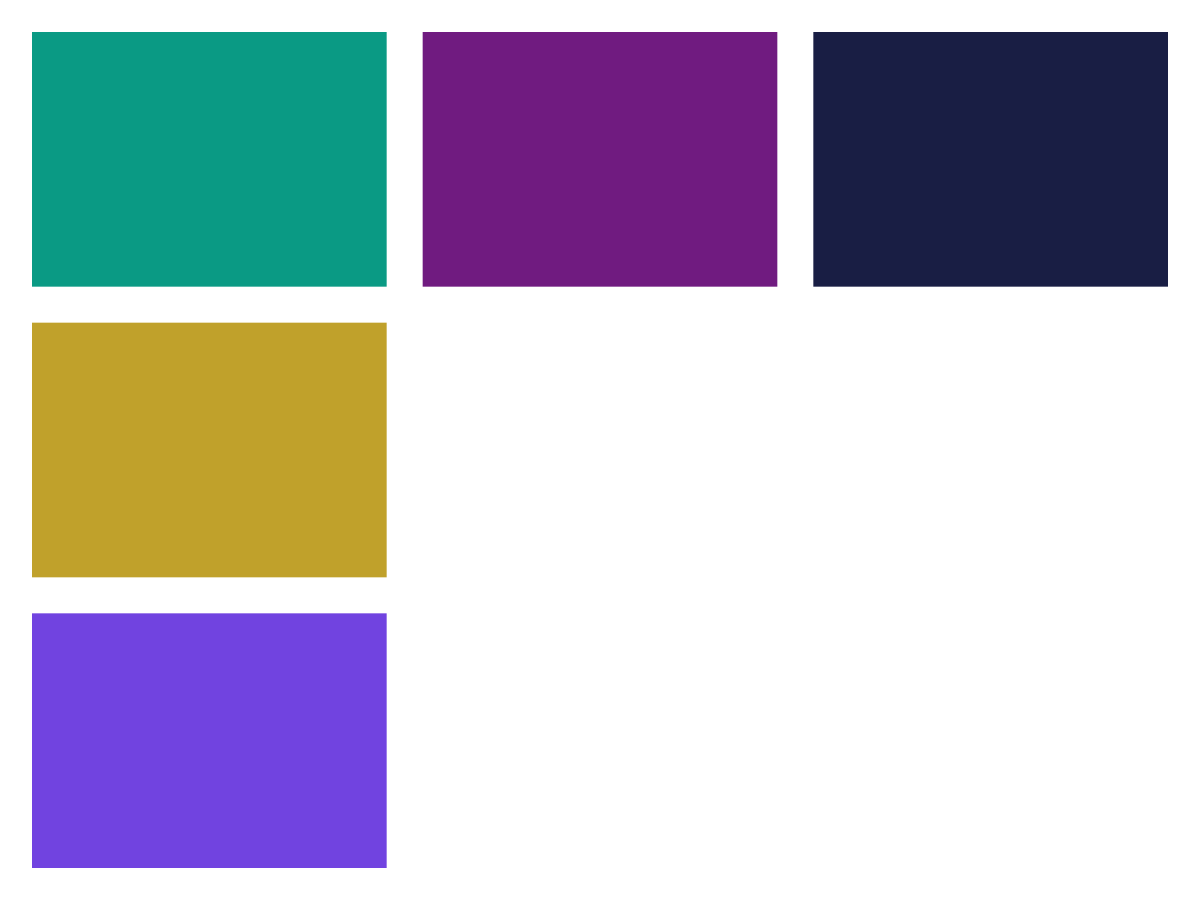

In [89]:
colors = [
    "#7143E0", # Light purple
    "#191E44", # Dark blue
    "#0A9A84", # Yellow
    "#C0A12B", # Magenta
    "#701B80", # Light green
    "#2E6137", # Spiral color green
]
# Code to create the above figure
n = 4
t = range(0, 2*π*n, length=10000)
x = (2*π*n .- t).*cos.(t)
y = (2*π*n .- t).*sin.(t)
fig = Figure()
ax = Axis(fig[1, 1])
hidedecorations!(ax)
hidespines!(ax)
Box(fig[2,1], color = colors[4], strokewidth = 0)
Box(fig[1,3], color = colors[2], strokewidth = 0)
Box(fig[3,1], color = colors[1], strokewidth = 0)
Box(fig[1,1], color = colors[3], strokewidth = 0)
Box(fig[1,2], color = colors[5], strokewidth = 0)
lines(x,y, color = colors[6], linewidth=4)
fig


## Problem 7: Colatz conjecture

Given a positive integer, create a function that counts the steps it takes to reach 1 following the Collatz conjecture algorithm (if the number is odd do $n = 3n+1$ otherwise do $n = n/2$ until you reach 1). Test it with the number 100 to get 25. Ensure that your function is type stable by calling @code_warntype your_function(100) and getting no red text.

* **Hint:** You can use the ÷ (\div \<tab\>) to get the division symbol. This does integer division if both arguments are integers.

In [27]:
# Code for Colatz
function Colatz(n)
    count = 0
    while n > 25
        if n%2 == 0
            n = n ÷ 2
        else
            n = 3*n + 1
        end
        count += 1
    end
    return count
end

Colatz(100)


2

In [28]:
# test type instability here
@code_warntype Colatz(100)

MethodInstance for Colatz(::Int64)
  from Colatz(n) @ Main c:\Users\USAID\Documents\2023-2024\phys 218\NonLinearDynamics\Julia Practice\Problems.ipynb:2
Arguments
  #self#::Core.Const(Colatz)
  n@_2::Int64
Locals
  count::Int64
  n@_4::Int64
Body::Int64
1 ─       (n@_4 = n@_2)
└──       (count = 0)
2 ┄ %3  = (n@_4 > 25)::Bool
└──       goto #7 if not %3
3 ─ %5  = (n@_4 % 2)::Int64
│   %6  = (%5 == 0)::Bool
└──       goto #5 if not %6


4 ─       (n@_4 = n@_4 ÷ 2)
└──       goto #6
5 ─ %10 = (3 * n@_4)::Int64
└──       (n@_4 = %10 + 1)
6 ┄       (count = count + 1)
└──       goto #2
7 ─       return count



## Problem 8: Henon map

Create a function that given $u_0$, N it creates an orbit of length N of the Henon map
$$
x_{n+1} = 1 - 1.4 x_n^2 + y_n \\
y_{n+1} = 0.3 x_n
$$
This map produces an orbit iteratively, i.e. starting from u0 = (x0, y0) one applies the above rule to get u1 = (x1, y1), and then applies the rule again on u1 to get u2, and so on. The orbit consists of the sequence of states [u0, u1, u2, ...]. Use u0 = (0.0, 0.0).


In [18]:
u0 = (0.0,0.0)
N = 600;

In [11]:
# Function for Henon's map
function Henon(u0,N)
    x = zeros(N)
    y = zeros(N)
    x[1] = u0[1]
    y[1] = u0[2]
    for i = 1:N-1
        x[i+1] = 1 - 1.4*x[i]^2 + y[i]
        y[i+1] = 0.3*x[i]
    end
    return x, y
end

Henon (generic function with 1 method)

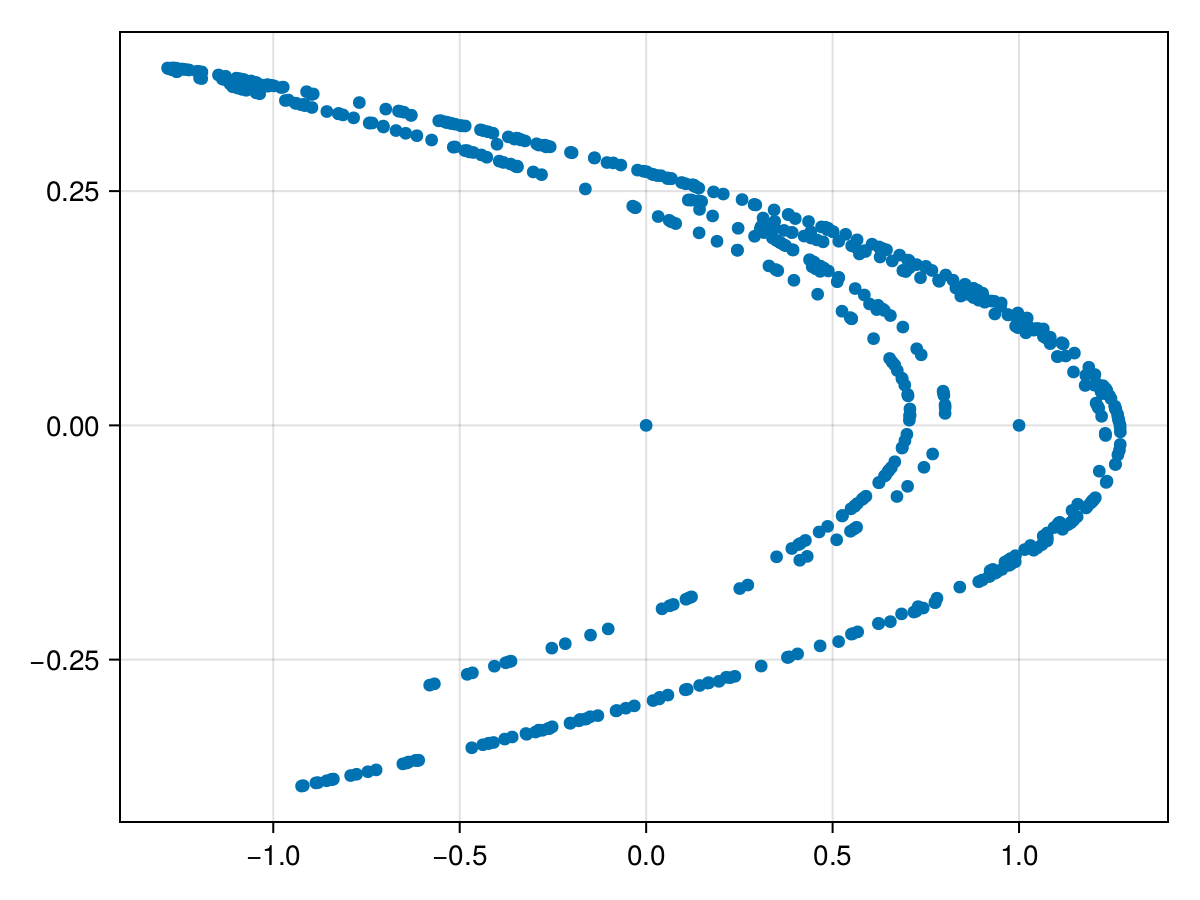

In [19]:
# scatter the points to check your work
x, y = Henon(u0, N)
fig = Figure()
Axis(fig[1,1])
scatter!(x,y)
fig

# Problem 9: Newton-Rapson's method

The Newton-Rapson method is an algorithm to find the roots of a function. Assume that we have a function $f(x)$. A first order Taylor expansion of $f(x)$ around $x_0$ is given by:
$$
f(x) \approx f(x_0) + f'(x_0) (x - x_0)
$$
If we set $f(x) = 0$ we get:
$$
x = x_0 - \frac{f(x_0)}{f'(x_0)}
$$
This means that if we start with an initial guess $x_0$ we can get a better guess $x_1$ by using the above formula. We can then use $x_1$ to get $x_2$ and so on. This is the Newton-Rapson method.

* Create a function that given a function $f(x)$, its derivative $f'(x)$, an initial guess $x_0$ and a tolerance $\epsilon$ it returns the root of the function. The function should stop when the difference between two successive estimates is less than $\epsilon$.

Take:
$$
f(x) = x^3 - 3x \\
$$

Find the 3 roots of the function using the Newton-Rapson method. Use the initial guesses $x_0 = -2.0$, $x_0 = 0.5$ and $x_0 = 2.0$. Use a tolerance of $\epsilon = 10^{-6}$

In [4]:
# Newton Function
function Newton(f, df, x0, ϵ)
    count = 0
    r = x0
    o = 0
    while abs(r - o) >= ϵ 
        o = r
        r = r - (f(r)/df(r))
        count+=1
        if count >= 10
            return "no convergence"
            break
        end
    end
    return r, count
end

Newton (generic function with 1 method)

In [8]:
# test your function here
function f(x)
    x^3 - 3x
end
function df(x)
    3*x^2 - 3
end
Newton(f, df, 2, 1e-6)

(1.7320508075688774, 5)

Now try with:
$$
f(x) = x^5 - x - 1
$$
Use the initial guesses $x_0 = -1.0$ 
* Be careful with infinite loops. If the algorithm does not converge, it will never stop. You can add a counter to the while loop and stop if the counter reaches a certain value.

In [9]:
# test for the new function here
function g(x)
    x^5 - x - 1
end
function dg(x)
    5*x^4 - 1
end
Newton(g, dg, -1, 1e-6)

"no convergence"

However, this function has a root that is real. You can find it by starting with $x_0 = 1.0$.

In [10]:
# test for the root 
Newton(g, dg, 1, 1e-6)

(1.1673039782614396, 5)